# THE SOCIAL AND EDUCATIONAL CONSEQUENCES OF ADOLESCENT CHILDBEARING
A project about the trends in adolescent fertility. 

Available data demonstrates that teen pregnancies compromise education and lead to higher rates of school dropouts. The outcome can create or extend the vicious cycle of poverty for teenage moms and their children.

The adolescent birth rate is calculated as the number of live births to adolescent women (15-19 years) divided by the total number of adolescent women and multiplied by 1,000. 

# Pythonic access to the World Bank's data API

In [1]:
import wbgapi as wb

# Import all Python libraries to be use 

In [11]:
import requests
import json
from collections import defaultdict, OrderedDict
import matplotlib.pyplot as plt
'exec(%matplotlib inline)'
import pandas as pd
import numpy as np
import plotly.colors
import plotly.graph_objs as go
import seaborn as sns

In [3]:
#Series list for indicator Adolescent fertility rate (births per 1,000 women ages 15-19)
wb.series.info('SP.ADO.TFRT')

id,value
SP.ADO.TFRT,"Adolescent fertility rate (births per 1,000 women ages 15-19)"
,1 elements


In [6]:
#wb.economy.info()

In [64]:
#Global data for most recent year
df_global= wb.data.DataFrame(['SP.ADO.TFRT'], time=2018, labels= True)
df_global.head()

,Country,SP.ADO.TFRT
ZWE,Zimbabwe,83.2486
ZMB,Zambia,118.3048
YEM,"Yemen, Rep.",59.1624
PSE,West Bank and Gaza,51.8828
VIR,Virgin Islands (U.S.),27.6482


In [65]:
df_global[df_global['SP.ADO.TFRT']>50]

,Country,SP.ADO.TFRT
ZWE,Zimbabwe,83.248600
ZMB,Zambia,118.304800
YEM,"Yemen, Rep.",59.162400
PSE,West Bank and Gaza,51.882800
VEN,"Venezuela, RB",84.979200
URY,Uruguay,58.238600
UGA,Uganda,116.071400
TGO,Togo,88.687800
TZA,Tanzania,116.926000
TJK,Tajikistan,57.470600


In [12]:
#Global data since 1960 (oldest available)
df= wb.data.DataFrame(['SP.ADO.TFRT'], time=range(1960, 2020, 5),labels=True)
df.head()

,Country,YR1960,YR1965,YR1970,YR1975,YR1980,YR1985,YR1990,YR1995,YR2000,YR2005,YR2010,YR2015
ZWE,Zimbabwe,168.8736,173.1072,174.0480,172.6368,145.4352,117.5390,105.8928,101.1452,100.2418,106.7950,109.7422,95.2182
ZMB,Zambia,185.1564,190.2920,193.9052,191.1104,178.7280,166.0782,159.1766,159.1600,159.9716,153.2738,141.6012,126.7456
YEM,"Yemen, Rep.",166.7340,177.8518,182.2562,173.3012,162.3740,155.0234,148.7308,125.2850,95.8560,80.1800,71.2432,63.2800
PSE,West Bank and Gaza,111.2600,114.7842,112.1660,109.4358,101.7840,98.8530,106.0550,102.2372,81.1304,67.7154,62.8060,55.9764
VIR,Virgin Islands (U.S.),152.1580,163.4928,168.7316,130.5658,94.6638,83.8018,79.0418,69.5138,55.4724,49.5302,47.2822,35.6310


In [ ]:
#countries by region use wb.region.members, else economy. 

In [31]:
#Regional data since 1960 (oldest available)
df_regions= wb.data.DataFrame(['SP.ADO.TFRT'], time=range(1960, 2020, 2),labels=True, economy=('MEA','NAC','SSA','ECA','EAP','LAC','SAS'))
df_regions.head()

,Country,YR1960,YR1962,YR1964,YR1966,YR1968,YR1970,YR1972,YR1974,YR1976,...,YR2000,YR2002,YR2004,YR2006,YR2008,YR2010,YR2012,YR2014,YR2016,YR2018
SAS,South Asia,114.493930,115.012736,115.780008,116.298515,116.475871,116.680775,116.741477,116.112729,115.844316,...,71.901568,65.514520,59.916108,54.284926,48.716808,43.310453,38.007820,33.114393,28.117751,24.523896
LAC,Latin America & Caribbean (excluding high income),107.459340,107.668030,105.387793,103.320752,101.200433,98.795720,96.100552,95.016608,93.938399,...,83.471386,81.487021,78.650848,75.879590,73.389554,71.131113,68.819704,66.843984,64.839204,62.886575
EAP,East Asia & Pacific (excluding high income),75.328169,73.395158,69.000332,64.508007,58.158093,50.463827,43.607292,40.424785,36.654974,...,21.961930,20.492377,19.279504,18.947554,19.865720,21.371930,22.439597,22.333530,22.220158,22.150098
ECA,Europe & Central Asia (excluding high income),47.333257,47.430734,45.672844,45.028514,45.683838,46.723482,47.282130,48.428503,49.640998,...,35.701826,31.428093,31.300079,31.209678,30.820143,30.281091,29.801647,28.537237,27.192281,25.756003
SSA,Sub-Saharan Africa (excluding high income),153.973541,154.246186,153.995500,153.862480,154.041618,154.475994,155.157783,155.093673,154.899692,...,128.351369,126.170265,123.604347,121.104554,118.329871,115.180844,111.911598,108.209159,104.578196,101.222099


In [32]:
#What region has the highest fertility? 
df_regions.sort_values(by='YR2018',ascending=True).round()

,Country,YR1960,YR1962,YR1964,YR1966,YR1968,YR1970,YR1972,YR1974,YR1976,...,YR2000,YR2002,YR2004,YR2006,YR2008,YR2010,YR2012,YR2014,YR2016,YR2018
NAC,North America,79.0,75.0,71.0,67.0,64.0,61.0,59.0,56.0,52.0,...,43.0,40.0,39.0,38.0,35.0,31.0,26.0,23.0,20.0,18.0
EAP,East Asia & Pacific (excluding high income),75.0,73.0,69.0,65.0,58.0,50.0,44.0,40.0,37.0,...,22.0,20.0,19.0,19.0,20.0,21.0,22.0,22.0,22.0,22.0
SAS,South Asia,114.0,115.0,116.0,116.0,116.0,117.0,117.0,116.0,116.0,...,72.0,66.0,60.0,54.0,49.0,43.0,38.0,33.0,28.0,25.0
ECA,Europe & Central Asia (excluding high income),47.0,47.0,46.0,45.0,46.0,47.0,47.0,48.0,50.0,...,36.0,31.0,31.0,31.0,31.0,30.0,30.0,29.0,27.0,26.0
MEA,Middle East & North Africa,137.0,138.0,137.0,135.0,132.0,127.0,123.0,120.0,116.0,...,42.0,39.0,39.0,38.0,38.0,39.0,41.0,41.0,40.0,40.0
LAC,Latin America & Caribbean (excluding high income),107.0,108.0,105.0,103.0,101.0,99.0,96.0,95.0,94.0,...,83.0,81.0,79.0,76.0,73.0,71.0,69.0,67.0,65.0,63.0
SSA,Sub-Saharan Africa (excluding high income),154.0,154.0,154.0,154.0,154.0,154.0,155.0,155.0,155.0,...,128.0,126.0,124.0,121.0,118.0,115.0,112.0,108.0,105.0,101.0


In [38]:
df.dtypes

code            object
Country         object
SP.ADO.TFRT    float64
dtype: object

In [34]:
# "Women first married by age 18"
indicator_string = "SP.M18.2024.FE.ZS"

In [36]:
df_childmarriage= wb.data.DataFrame(['SP.M18.2024.FE.ZS'], economy= wb.region.members('LAC'),time=range(2000,2021), labels=True)
df_childmarriage.head()

,Country,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,...,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
ECU,Ecuador,NaN,NaN,NaN,NaN,22.2,NaN,NaN,NaN,NaN,...,NaN,20.4,NaN,NaN,NaN,NaN,NaN,22.2,NaN,NaN
BLZ,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.9,NaN,NaN,NaN,NaN,33.5,NaN,NaN,NaN,NaN
GTM,Guatemala,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,29.5,NaN,NaN,NaN,NaN,NaN
ARG,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VCT,St. Vincent and the Grenadines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#To get the most recent value + year since there is a lot of data missing
#df_childmarriage.groupby('Country').agg(lambda df: df.values[df['YR2000'|'YR2001'|'YR2002'|'YR2003'|'YR2004'|'YR2005'|'YR2006'|'YR2007'|'YR2008'|'YR2011'|'YR2012'|'YR2013'|'YR2014'|'YR2015'|'YR2016'|'YR2017'|'YR2018'|'YR2019'|'YR2020'].values.argmax()])

Niger story: In Niger, where adolescent fertility rate is the highest globally, on average, girls get only 3 years of school. About one in five young women will have given birth before the age of 18. The country also has the world's highest rate of early marriage, with 76 percent of women ages 20-24 first married by the age of 18 and 28 percent by the age of 15.

In [39]:
#Adolescent fertility rate
df= wb.data.DataFrame(['SP.ADO.TFRT'], time=(2018), economy= 'NER',labels=True)
df.head()

,Country,SP.ADO.TFRT
NER,Niger,183.5134


In [40]:
#Population ages 15-19, female 
wb.data.DataFrame(['SP.POP.1519.FE.5Y'], time=(2018), economy= 'NER',labels=True)

,Country,SP.POP.1519.FE.5Y
NER,Niger,10.613802


In [45]:
#wb.series.info('HD.HCI.EYRS.FE')

#Expected years of school is calculated as the sum of age-specific enrollment rates between ages 4 and 17.
#wb.data.DataFrame(['HD.HCI.EYRS.FE'], time=(2018), economy= 'NER',labels=True) 

Link: https://databank.worldbank.org/id/2ddc971b?Code=HD.HCI.EYRS.FE&report_name=Gender_Indicators_Report&populartype=series

# SSA: Lower secondary completion rate, female (% of relevant age group) 

In [48]:
df_secondary= wb.data.DataFrame(["SE.SEC.CMPT.LO.FE.ZS"], economy= wb.region.members("SSF"), time=range(2000,2021), labels=True, skipBlanks=True)
df_secondary.head()

,Country,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
TCD,Chad,3.74924,NaN,4.788600,4.64133,4.886880,NaN,5.72485,NaN,NaN,...,8.897750,9.440940,9.06641,10.339710,NaN,8.62519,8.480690,9.78263,9.892620,NaN
MDG,Madagascar,13.17431,12.83751,12.925830,14.13671,15.131540,17.843821,19.55154,21.877230,24.355310,...,27.845240,30.523310,32.54681,36.838951,36.683022,37.48214,36.505489,NaN,38.244339,36.628262
UGA,Uganda,12.75321,12.98846,16.444559,17.02853,16.955629,NaN,NaN,20.224701,21.493361,...,25.186649,24.291559,23.40941,27.302250,27.735571,NaN,27.332279,25.14159,NaN,NaN
GNB,Guinea-Bissau,9.35689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.560940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAF,Central African Republic,NaN,NaN,NaN,NaN,NaN,7.257690,NaN,NaN,NaN,...,NaN,NaN,8.39636,NaN,NaN,NaN,7.635840,NaN,NaN,NaN


In [49]:
#To get the most recent value + year since there is a lot of data missing
#df_secondary.groupby('Country').agg(lambda df: df.values[df['YR2000'|'YR2001'|'YR2002'|'YR2003'|'YR2004'|'YR2005'|'YR2006'|'YR2007'|'YR2008'|'YR2011'|'YR2012'|'YR2013'|'YR2014'|'YR2015'|'YR2016'|'YR2017'|'YR2018'|'YR2019'|'YR2020'].values.argmax()])

In [50]:
df_secondary[df_secondary.YR2019 > 50]

,Country,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
GHA,Ghana,48.242840,45.828098,49.446251,46.912182,47.895409,50.453548,NaN,NaN,58.793709,...,NaN,60.120232,59.543800,63.055660,63.074039,71.925491,NaN,72.031189,77.400642,78.496971
SYC,Seychelles,97.477928,99.483871,97.089951,102.294197,NaN,112.760063,NaN,110.576920,112.184868,...,108.541969,108.231712,NaN,103.001579,115.689377,116.031754,114.376999,107.301590,112.422363,110.225563
GMB,"Gambia, The",31.015850,30.515039,30.399269,39.619362,46.402859,51.136101,53.930119,51.239151,46.862690,...,50.464531,56.371288,59.009029,58.743771,59.422390,NaN,NaN,NaN,NaN,60.076870
SLE,Sierra Leone,NaN,17.089220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,34.197990,44.001820,43.916222,NaN,43.959511,54.244499,50.643330,50.218510,72.371880
MUS,Mauritius,77.835381,79.537048,78.564796,81.675438,82.268753,84.747330,82.710747,82.433441,87.917908,...,87.511528,88.566612,86.368492,88.197113,90.825104,89.974731,93.127510,89.851463,92.845863,93.055717


In [51]:
df_secondary[df_secondary.YR2019 < 50]

,Country,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
MDG,Madagascar,13.17431,12.837510,12.925830,14.13671,15.131540,17.843821,19.55154,21.877230,24.355310,...,27.845240,30.523310,32.546810,36.838951,36.683022,37.482140,36.505489,NaN,38.244339,36.628262
TGO,Togo,13.42664,16.326599,18.449949,20.70977,23.241329,26.713240,27.66403,22.857050,24.600809,...,25.116199,28.962629,NaN,29.744671,29.158960,32.233021,34.478889,38.813541,41.114491,44.493591
MOZ,Mozambique,3.04858,NaN,4.532930,NaN,6.414340,7.915890,8.76864,11.277330,14.790430,...,18.853979,21.281719,21.213810,22.311470,21.754940,22.393999,NaN,22.801380,NaN,24.342199
BFA,Burkina Faso,5.01063,5.865800,NaN,6.73274,NaN,8.152260,9.16082,9.714810,12.511210,...,14.610170,15.989250,17.929291,19.901110,23.031549,25.663740,29.854380,37.143810,44.540691,44.137070
MRT,Mauritania,NaN,15.492240,14.287040,14.42038,14.205550,16.930710,19.60829,15.862490,NaN,...,NaN,NaN,21.027821,NaN,28.876030,32.253059,29.304449,36.288311,44.143169,44.999458
CIV,Cote d'Ivoire,25.79422,16.343439,17.604780,NaN,NaN,NaN,19.49518,19.176531,24.015280,...,NaN,21.679951,25.158819,NaN,25.894030,27.680120,31.675880,38.189960,42.511269,46.582481
RWA,Rwanda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,38.087090,NaN,38.244869,36.783371,37.478062,39.912041,39.209831,45.972691
NER,Niger,3.94755,3.944480,3.639820,3.48810,5.739320,5.994640,6.55042,6.409700,7.415580,...,7.237380,8.292450,9.482870,9.875550,9.988720,12.859320,14.365770,15.262030,16.690069,15.733990
BDI,Burundi,NaN,NaN,NaN,NaN,6.646440,7.051520,6.19222,NaN,9.606100,...,13.666430,15.600250,17.096210,21.097200,24.104130,31.933710,37.797138,42.886379,35.980991,33.228619
SEN,Senegal,10.65139,10.712640,11.669700,16.86920,15.548230,18.132351,20.01082,27.614321,23.101740,...,28.472469,30.285120,33.106110,35.053822,40.677681,40.403519,NaN,NaN,NaN,40.898979


In [67]:
df_secondary_2019= wb.data.DataFrame(["SE.SEC.CMPT.LO.FE.ZS"], economy= wb.region.members("SSF"), time=(2019), labels=True, skipBlanks=True)
df_secondary_2019

,Country,SE.SEC.CMPT.LO.FE.ZS
MDG,Madagascar,36.628262
GHA,Ghana,78.496971
TGO,Togo,44.493591
MOZ,Mozambique,24.342199
BFA,Burkina Faso,44.137070
MRT,Mauritania,44.999458
SYC,Seychelles,110.225563
GMB,"Gambia, The",60.076870
CIV,Cote d'Ivoire,46.582481
RWA,Rwanda,45.972691


In [59]:
df_secondary_2019 = df_secondary_2019.rename(columns = {'SE.SEC.CMPT.LO.FE.ZS': 'Year2019'}, inplace = False)


NameError: name 'plt' is not defined

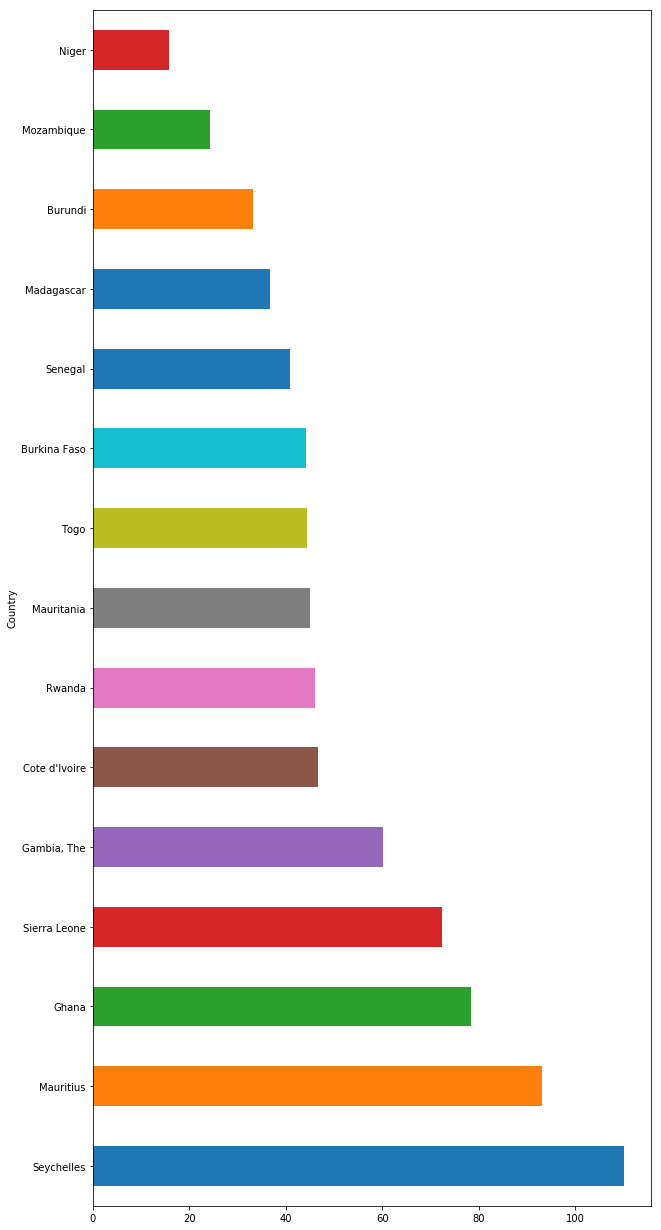

In [62]:
df_secondary_2019.groupby('Country').Year2019.mean().sort_values(ascending=False, na_position='last').plot(kind='barh', figsize=(10,22))
plt.show()

In [39]:
#All the data 
df2= pd.read_csv('Data.1617725610913.csv')
df2.head()

,Adolescent Fertility Rate (most recent value),Country,code,Region,Child marriage by 15(most recent value),Country.1,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Region.1,Expected years of schooling (most recent value),Country.2,Women who were first married by age 18 (% of women ages 20-24),Year of child marriage data,% of female population ages 15-19,Country.3,Year of expected years of school data,Expected years of schooling
0,42,Antigua and Barbuda,ATG,Latin America & Caribbean,NaN,Antigua and Barbuda,42,Latin America & Caribbean,15.65757,Antigua and Barbuda,NaN,NaN,4,Antigua and Barbuda,2020,13.29995
1,63,Argentina,ARG,Latin America & Caribbean,NaN,Argentina,63,Latin America & Caribbean,18.90873,Argentina,NaN,NaN,4,Argentina,2020,13.06125
2,21,Aruba,ABW,Latin America & Caribbean,NaN,Aruba,21,Latin America & Caribbean,14.21071,Aruba,NaN,NaN,4,Aruba,..,No data available since 2010
3,31,Barbados,BRB,Latin America & Caribbean,8.0,Barbados,31,Latin America & Caribbean,16.69400,Barbados,29.0,2012.0,5,Barbados,..,No data available since 2010
4,68,Belize,BLZ,Latin America & Caribbean,6.0,Belize,68,Latin America & Caribbean,13.41657,Belize,34.0,2016.0,5,Belize,..,No data available since 2010


In [9]:
df= df[df['SP.ADO.TFRT']>50]

In [36]:
df3.head()

,geometry,Country,code,lat,lng,Region,Income Group,2018,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015
0,"{""type"":""Polygon"",""coordinates"":[[[71.049802,3...",Afghanistan,AFG,33.0,65.0,South Asia,Low income,65,145,145,145,148,153,159,163,165,154,138,114,82
1,"{""type"":""Polygon"",""coordinates"":[[[32.840809,3...",Akrotiri Sovereign Base Area,-99,NaN,NaN,NaN,NaN,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available
2,"{""type"":""MultiPolygon"",""coordinates"":[[[[20.92...",Aland,ALA,NaN,NaN,NaN,NaN,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available
3,"{""type"":""Polygon"",""coordinates"":[[[19.747766,4...",Albania,ALB,41.0,20.0,Europe & Central Asia,Upper middle income,20,54,50,36,27,20,16,18,19,19,19,20,20
4,"{""type"":""Polygon"",""coordinates"":[[[8.60251,36....",Algeria,DZA,28.0,3.0,Middle East & North Africa,Lower middle income,10,124,119,108,98,69,40,28,19,12,10,11,11


In [40]:
df3= df3[['Country','Region','2018','1960','1965','1970','1975','1980','1985','1990','1995','2000','2005','2010','2015']]
df3.tail()

,Country,Region,2018,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015
224,Togo,Sub-Saharan Africa,89,151,147,145,145,141,130,114,101,95,93,92,90
232,Uganda,Sub-Saharan Africa,116,172,174,174,174,174,173,176,178,172,157,139,124
236,United Republic of Tanzania,Sub-Saharan Africa,117,158,157,156,156,153,149,143,137,134,134,127,120
251,Zambia,Sub-Saharan Africa,118,185,190,194,191,179,166,159,159,160,153,142,127
252,Zimbabwe,Sub-Saharan Africa,83,169,173,174,173,145,118,106,101,100,107,110,95


In [39]:
df3= df3[df3['Region']=='Sub-Saharan Africa']

In [31]:
df3['2018']= df3['2018'].astype(int)

In [34]:
df3[df3['2018']>100]

,Country,Region,2018,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015
7,Angola,Sub-Saharan Africa,148,202,214,223,224,224,223,217,207,197,186,173,157
36,Burkina Faso,Sub-Saharan Africa,102,185,178,172,168,163,154,147,143,139,133,121,109
39,Cameroon,Sub-Saharan Africa,103,171,180,187,192,196,194,183,168,155,139,125,112
43,Central African Republic,Sub-Saharan Africa,127,173,176,177,174,168,162,157,152,149,146,141,133
44,Chad,Sub-Saharan Africa,158,197,200,206,213,217,218,218,217,212,202,185,168
59,Democratic Republic of the Congo,Sub-Saharan Africa,123,189,181,164,149,141,135,129,125,125,129,130,126
69,Equatorial Guinea,Sub-Saharan Africa,153,175,178,179,177,176,183,193,192,183,176,170,160
92,Guinea,Sub-Saharan Africa,133,203,192,184,179,179,181,181,177,169,159,150,140
93,Guinea Bissau,Sub-Saharan Africa,103,108,109,109,109,117,128,136,136,130,123,113,106
110,Ivory Coast,Sub-Saharan Africa,116,232,221,217,215,202,178,156,142,138,134,127,120


In [15]:
df3[['2018','1960','1965','1970','1975','1980','1985','1990','1995','2000','2005','2010','2015']] =df3[['2018','1960','1965','1970','1975','1980','1985','1990','1995','2000','2005','2010','2015']].astype(int)

In [18]:
df3[['2018','1960']].diff() 

,2018,1960
7,NaN,NaN
25,-64.0,-116.0
30,-39.0,75.0
36,57.0,24.0
37,-47.0,-94.0
39,48.0,80.0
41,-30.0,-54.0
43,54.0,56.0
44,31.0,24.0
49,-94.0,-77.0


In [ ]:
df.pct_change() 

In [43]:
df[df['YR2008']<20].sort_values(by='YR2008')

,Country,YR2008,YR2009,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018
PRK,"Korea, Dem. People’s Rep.",0.561000,0.498000,0.435000,0.372000,0.309000,0.303800,0.298600,0.293400,0.288200,0.283000,0.286000
KOR,"Korea, Rep.",1.952400,1.905800,1.859200,1.812600,1.766000,1.688600,1.611200,1.533800,1.456400,1.379000,1.320400
HKG,"Hong Kong SAR, China",3.008200,3.011400,3.014600,3.017800,3.021000,2.957800,2.894600,2.831400,2.768200,2.705000,2.646200
MAC,"Macao SAR, China",3.318000,3.290000,3.262000,3.234000,3.206000,3.041000,2.876000,2.711000,2.546000,2.381000,2.303600
CHE,Switzerland,4.299800,4.100600,3.901400,3.702200,3.503000,3.355000,3.207000,3.059000,2.911000,2.763000,2.643800
JPN,Japan,4.987000,4.860000,4.733000,4.606000,4.479000,4.339200,4.199400,4.059600,3.919800,3.780000,3.664400
SVN,Slovenia,5.078800,4.991600,4.904400,4.817200,4.730000,4.539200,4.348400,4.157600,3.966800,3.776000,3.652400
NLD,Netherlands,5.124800,4.955600,4.786400,4.617200,4.448000,4.316000,4.184000,4.052000,3.920000,3.788000,3.702800
SGP,Singapore,5.550600,5.140200,4.729800,4.319400,3.909000,3.833200,3.757400,3.681600,3.605800,3.530000,3.513400
DNK,Denmark,5.582400,5.295800,5.009200,4.722600,4.436000,4.373400,4.310800,4.248200,4.185600,4.123000,4.169000


In [16]:
#SSA positive examples
df[df['Country']=='Mauritania']

,Country,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,YR1968,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
MRT,Mauritania,148.473,145.703,142.933,140.3424,137.7518,135.1612,132.5706,129.98,128.1266,...,81.7326,80.3748,79.017,77.4234,75.8298,74.2362,72.6426,71.049,69.628,NaN


In [13]:
df.to_csv('dataformap.csv', index= True)

In [159]:
#Create a new column with the total average per region in eight years
df[['LCN', 'MEA','NAC','SAS','EAS','SSF','ECS']].mean()

LCN     66.160834
MEA     40.196243
NAC     23.650609
SAS     33.280492
EAS     20.694122
SSF    108.207076
ECS     18.787671
dtype: float64

Proposal: For the remaining missing values, I will create a list of specific countries that are missing data. If it's possible, can we find those missing values from an external source? If that's the case, I shall construct a For Loop or a function to fill in missing values.

In order to try address this issue we can look into options of creating a regression analysis and project potential 2019 and 2020 numbers. We may be able to do this if we have data of five consecutive years. We can compute the average and use it as a placeholder.

In [ ]:
x_value = [66.160834, 40.196243, 23.650609, 33.280492, 20.694122, 108.207076]
country_value= df[['LCN', 'MEA','NAC','SAS','EAS','SSF']]

chart = sns.barplot(country_value,x_value, data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.axhline(y = 42.455699, label = 'World Average')
plt.title('Adolescent Fertility Rate')
plt.xlabel('Country')
plt.ylabel('Per 1000s births')

All the images are saved in the repository

Ideas:
A line graph that shows the world scope. What's the easier way to calculate these numbers?
A map showing the income group of the country vs. the adolescent fertility rate

The data analysis and visualizations take a closer look at this gender-imbalanced picture over time, revealing insights that can be useful. 

In [83]:
c = wb.economy.DataFrame()
df= wb.data.DataFrame(['SE.PRM.ENRR.FE','SE.PRM.ENRR.MA','SE.PRM.NENR.FE','SE.PRM.NENR.MA','SE.TER.ENRR.FE','SE.TER.ENRR.MA','SE.PRM.CMPT.FE.ZS','SE.PRM.CMPT.MA.ZS',
                       'SE.SEC.PROG.FE.ZS', 'SE.SEC.PROG.MA.ZS','SE.SEC.CMPT.LO.FE.ZS','SE.SEC.CMPT.LO.MA.ZS','SE.ADT.1524.LT.FE.ZS','SE.ADT.1524.LT.MA.ZS','SP.MTR.1519.ZS','SP.POP.1519.FE.5Y','SP.ADO.TFRT'], economy=['DOM'], time=range(2010,2021), labels=True).join(c['incomeLevel'])
df

,Series,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,incomeLevel
SE.PRM.ENRR.FE,"School enrollment, primary, female (% gross)",103.413712,104.316063,102.415100,103.773483,102.205101,106.218613,105.816933,103.969254,102.471123,109.430237,NaN,NaN
SE.PRM.ENRR.MA,"School enrollment, primary, male (% gross)",117.349602,115.209389,113.312408,114.277481,112.734459,116.414162,114.626648,111.493607,108.808540,114.920113,NaN,NaN
SE.PRM.NENR.FE,"School enrollment, primary, female (% net)",88.573640,90.046500,89.317640,89.522740,88.140030,92.593530,92.982600,92.709410,92.689570,NaN,NaN,NaN
SE.PRM.NENR.MA,"School enrollment, primary, male (% net)",95.054700,93.662600,92.653780,92.123170,90.389300,94.434180,93.662400,93.033380,92.736690,NaN,NaN,NaN
SE.TER.ENRR.FE,"School enrollment, tertiary, female (% gross)",NaN,NaN,59.829079,NaN,60.912060,66.989250,69.959068,77.012421,NaN,NaN,NaN,NaN
SE.TER.ENRR.MA,"School enrollment, tertiary, male (% gross)",NaN,NaN,37.509369,NaN,37.827011,36.648972,39.185909,42.982140,NaN,NaN,NaN,NaN
SE.PRM.CMPT.FE.ZS,"Primary completion rate, female (% of relevant...",92.029739,94.054382,94.617638,94.855713,94.734993,97.857582,96.556793,94.353561,92.582321,92.719048,NaN,NaN
SE.PRM.CMPT.MA.ZS,"Primary completion rate, male (% of relevant a...",93.342018,92.115860,92.457672,93.634079,95.769051,101.140633,101.680527,96.269852,93.655380,93.870331,NaN,NaN
SE.SEC.PROG.FE.ZS,"Progression to secondary school, female (%)",97.478640,95.254560,97.227260,99.208580,97.687210,95.078590,94.312370,94.846600,NaN,NaN,NaN,NaN
SE.SEC.PROG.MA.ZS,"Progression to secondary school, male (%)",91.808190,90.777500,92.630520,95.564470,92.992170,90.157510,90.974000,91.577440,NaN,NaN,NaN,NaN
